# Using ANN,CNN,Transfer learning Models using keras to work on MNIST Dateset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/elyas1376/ComputerVision/blob/main/CNN/CCN_CODE.ipynb)


### EDA

In [11]:
#@title Imports
from skimage import data
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image shape:  (512, 512, 3) 
type is : <class 'numpy.ndarray'>


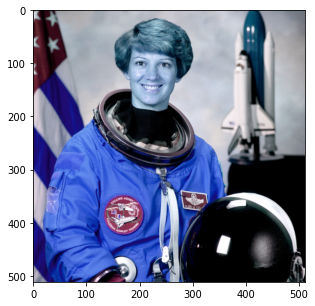

In [12]:
#@title Worling with color channels 

image =data.astronaut()

print("Image shape: ",image.shape , "\ntype is :",type(image))

plt.figure(figsize=(5,5))
plt.imshow(image[:,:,::-1]);

Text(0.5, 1.0, 'CNN image')

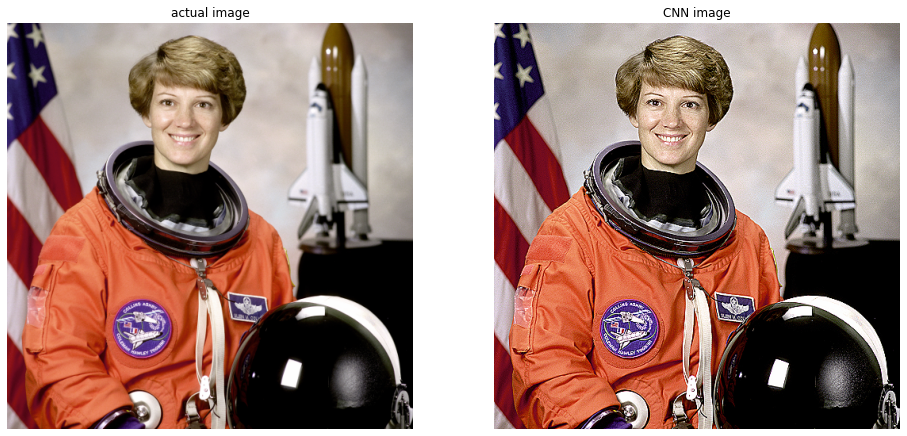

In [ ]:
#@title applying a filter to the image
kernel=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])


if kernel.sum():
  kernel=kernel/kernel.sum()

conved_img=cv2.filter2D(image,-1,kernel)

fig,ax=plt.subplots(1,2,figsize=(16,32))

ax[0].imshow(image)
ax[0].axis('off')
ax[0].set_title('actual image')

ax[1].imshow(conved_img)
ax[1].axis('off')
ax[1].set_title('Image with Appylied Filter');

### Loading MNIST Dataset


In [20]:
#@title Imports
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [21]:
#@title Loading the MNIST dataset
(x_train, y_train), (x_test, y_test)=mnist.load_data()

#Assertion Test for the data shape sizes
assert x_train.shape == (60000, 28, 28)
assert y_train.shape == (60000,)
assert x_test.shape  == (10000, 28, 28)
assert y_test.shape  == (10000,)

print("Data Shapes:")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


Data Shapes:
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


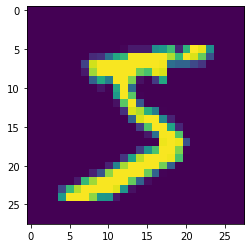

In [22]:
plt.imshow(x_train[0])

In [23]:
#Labels
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [24]:
x_train[5].shape

(28, 28)

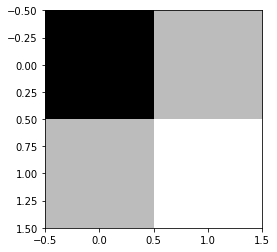

In [25]:
#Slicing an image array of a label
image_array=np.array([[0,188],
                     [188,256]])
plt.imshow(image_array,cmap='gray')

label : 5


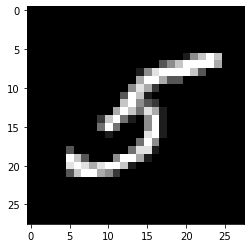

In [26]:
train_index=35

plt.imshow(x_train[train_index],cmap='gray')
print("label :",y_train[train_index])

## Creating MNIST Model using ANNs

In [ ]:
#@title Imports and loading  data
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the images to fit our Neural Network
x_train_final=x_train.reshape(-1,28*28)
x_test_final=x_test.reshape(-1,28*28)

In [ ]:
print(x_train_final.shape)
print(x_test_final.shape)

(60000, 784)
(10000, 784)


In [ ]:
#@title Categorical encoding for labels
from keras.utils import to_categorical

num_class=10

y_train_cat=to_categorical(y_train,num_class)
y_test_cat=to_categorical(y_test,num_class)

print("Categorically encoded label: ",y_train_cat[0])
print("Actual Label: ",y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [ ]:
print(y_train_cat.shape)
print(y_test_cat.shape)

(60000, 10)
(10000, 10)


In [ ]:
#@title Creating the ANN model 
from keras.layers import Dense ,Input
from keras.models import Sequential
from tensorflow.keras.utils import plot_model

model=Sequential()
model.add(Input(shape=(28*28)))
model.add(Dense(20,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_class,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Model Summary
model.summary()
plot_model(model)

In [ ]:
#@title Setting Hyperparameters
batch_size=128
epochs=30
verbose=1
shuffle=True

In [ ]:
#@title Training the Model
model.fit(x_train_final,
          y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_data=(x_test_final,y_test_cat),
          shuffle=shuffle)

Epoch 1/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9351 - val_loss: 0.2682 - val_accuracy: 0.9289
Epoch 2/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2205 - accuracy: 0.9370 - val_loss: 0.2702 - val_accuracy: 0.9272
Epoch 3/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2176 - accuracy: 0.9366 - val_loss: 0.2567 - val_accuracy: 0.9312
Epoch 4/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2146 - accuracy: 0.9371 - val_loss: 0.2620 - val_accuracy: 0.9279
Epoch 5/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2117 - accuracy: 0.9375 - val_loss: 0.2577 - val_accuracy: 0.9319
Epoch 6/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2078 - accuracy: 0.9396 - val_loss: 0.2755 - val_accuracy: 0.9256
Epoch 7/30
469/469 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9393 - val_loss: 0.2581 - val_accuracy: 0.9324
Epoch 

## CNN 

In [ ]:
#@title Imports and loading data 
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# @title Reshape and Normalizing Test set
x_train_final=x_train.reshape(-1,28,28,1)/255
x_test_final=x_test.reshape(-1,28,28,1)/255

#Assertion test for dataset shape
assert x_train_final.shape == (60000, 28, 28)
assert x_test_final.shape == (10000, 28, 28)


print(x_train_final.shape)
print(x_test_final.shape)

In [ ]:
#@title Applying Categorical encoding  for labels
from keras.utils import to_categorical
num_class=10

y_train_cat=to_categorical(y_train,num_class)
y_test_cat=to_categorical(y_test,num_class)

assert y_train_cat.shape == (60000, 10)
assert y_test_cat.shape  == (10000, 10)

print(y_train_cat.shape)
print(y_test_cat.shape)

print("Categorically encoded label: ",y_train_cat[0])
print("Actual Label: ",y_train[0])

In [ ]:
#@title Creating Convolutional Model
from keras.models import Sequential
from keras.layers import Dense ,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.utils import plot_model

model=Sequential()
model.add(Conv2D(filters=12,kernel_size=(3,3),activation='relu' , input_shape=(28,28,1)))#add a 2d CCN LAYER
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))#add a 2d CCN LAYER

model.add(MaxPool2D())
model.add(Flatten())

#appedning the out put to  an ANN
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))#output layer
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(model)
model.summary()

In [ ]:
model.layers

In [ ]:
#@title Setting Hyperparameters
batch_size=128
epochs=30
verbose=1
shuffle=True

In [ ]:
#@title Training the Model
model.fit(x_train_final,
          y_train_cat,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_data=(x_test_final,y_test_cat),
          shuffle=shuffle)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.7599 - accuracy: 0.7593 - val_loss: 0.1394 - val_accuracy: 0.9576
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1262 - accuracy: 0.9625 - val_loss: 0.0851 - val_accuracy: 0.9733
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0817 - accuracy: 0.9765 - val_loss: 0.0681 - val_accuracy: 0.9779
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0627 - accuracy: 0.9815 - val_loss: 0.0506 - val_accuracy: 0.9833
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0534 - accuracy: 0.9845 - val_loss: 0.0546 - val_accuracy: 0.9831
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0494 - val_accuracy: 0.9841
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.0498 - val_accuracy: 0.9839
Epoch 

In [ ]:
#@title Making prediciton from the model
prediction=model.predict(x_test_final)

print(prediction.shape)

In [ ]:
prediction[0]

In [ ]:
prediction[0].sum()#Softmax Applies Balance for The Summation of Prediction so that the sum of all prediction is 100 or simply

In [ ]:
  prediction=np.argmax(prediction,1)

In [ ]:
ypr=prediction

In [ ]:
print(type(model))

In [ ]:
#@title Plotting function for gridview of the output vs prediciton
def gridshow(x,y ,n = 5,mislabeled = False ,yp = None):
  if not mislabeled :
    grid = np.random.randint(0,len(x),size = (n,n))
  else:
    wrong_labels = np.where(ypr != y_test)[0]
    grid = np.random.choice(wrong_labels,size = n**2)
    grid = grid.reshape(n,n)

  fig,ax = plt.subplots(ncols= n,nrows= n,figsize = (2*n,2*n))
  for i in range(n):
    for j in range(n):
      ax[i][j].imshow(x[grid[i,j]],cmap = 'gray')
      ax[i][j].axis('off')
      label = 'y = '+ str(y[grid[i][j]])
      if yp is not None:
        label += ' | yp = '+ str(yp[grid[i][j]])
      ax[i][j].set_title(label)
#    plt.tight_layout()
  if yp is not None:
    count = y[np.squeeze(grid)] == ypr[np.squeeze(grid)]
    count = count.astype('int')
    count = np.count_nonzero(count)
    print(f'{count} correct predictions out of {n*n} samples.')

24 correct predictions out of 25 samples.


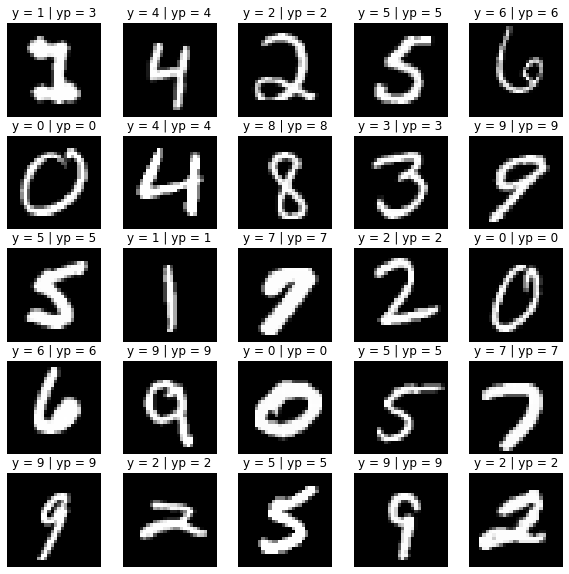

In [ ]:
gridshow(x_test,y_test,yp=ypr,mislabeled=False)

### Demontration of CNN Outputs in each layers

In [ ]:
model.layers

In [ ]:
first_conv=model.layers[0]
first_conv

In [ ]:
print("First layer activation : ",first_conv.activation)
print("First layer filter size : ",first_conv.filters)
print("First layer weights : ",first_conv.weights)

In [ ]:
print("X_test (NN input test set) shape:",x_test_final.shape)

(10000, 28, 28, 1)

In [ ]:
#@title Checking output size of each layer of our CNN Model
layers_output=[]
out=x_test_final.copy()
print(out.shape)
for layer in model.layers:
  out=layer(out)
  print(out.shape)
  layers_output.append(out)

   

(10000, 28, 28, 1)
(10000, 26, 26, 12)
(10000, 24, 24, 16)
(10000, 12, 12, 16)
(10000, 2304)
(10000, 16)
(10000, 10)


In [ ]:
first_conv(x_test_final).shape

TensorShape([10000, 26, 26, 12])

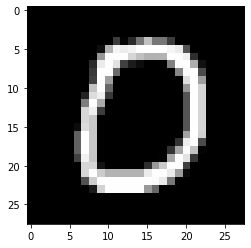

In [ ]:
n=10
plt.imshow(x_test[n],cmap='gray')

(26, 26, 12)


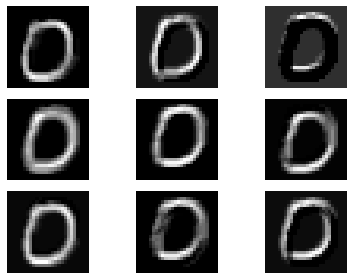

In [ ]:
#First Layer of Output
current_layer=layers_output[0][n]
print(current_layer.shape)
print("First Layer of CNN Output images")
fig,ax=plt.subplots(3,3)
for i in range(9):
  ax[i//3][i%3].imshow(current_layer[:,:,i],cmap='gray')
  ax[i//3][i%3].axis('off')
plt.tight_layout()

(24, 24, 16)


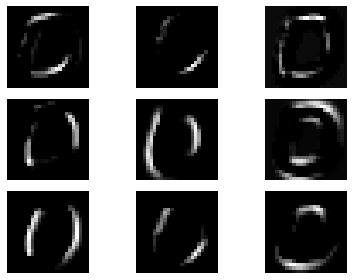

In [ ]:
#Second Layer of Output
current_layer=layers_output[1][n]
print(current_layer.shape)
print("Second Layer of CNN Output images")
fig,ax=plt.subplots(3,3)
for i in range(9):
  ax[i//3][i%3].imshow(current_layer[:,:,i],cmap='gray')
  ax[i//3][i%3].axis('off')
plt.tight_layout()

(12, 12, 16)


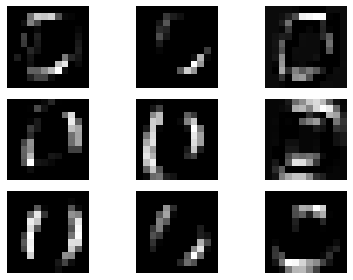

In [ ]:
#Third Layer of Output
current_layer=layers_output[2][n]
print(current_layer.shape)
print("Third Layer of CNN Output images")
fig,ax=plt.subplots(3,3)
for i in range(9):
  ax[i//3][i%3].imshow(current_layer[:,:,i],cmap='gray')
  ax[i//3][i%3].axis('off')
plt.tight_layout()